## Stroke Prediction

Source: Fedesoriano @ Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

Data Set Information: Database contains records for 5110 observations. For each respondent 11 attributes are known:

- **Health Indicators** which include:

    - **Hypertension**: This indicates whether the patient has high blood pressure (0 = No, 1 = Yes).

    - **Heart Disease**: This indicates whether the patient has a history of heart disease (0 = No, 1 = Yes).

    - **Average Glucose Level**: This represents the average level of glucose in the patient's blood.

    - **BMI**: This is the patient's Body Mass Index (a measure of body fat based on height and weight).

    - **Smoking Status**: This is a categorical variable indicating the patient's smoking history (formerly smoked, never smoked, smokes, Unknown).

- **Demographics** which include:

    - **Gender**: This indicates whether the patient is male or female.

    - **Age**: This represents the patient's age in years.

    - **Ever Married**: This indicates whether the patient has ever been married (Yes/No).

    - **Work Type**: This describes the type of employment the patient has (e.g., Private, Self-employed, Govt_job, Never_worked, children).

    - **Residence Type**: This indicates whether the patient resides in an urban or rural area.

- **Stroke**. This indicates whether the patient has had a stroke (0 = No, 1 = Yes).

## OBJECTIVE

You are a data scientist tapped by the Philippine Government to conduct research on the **most significant risk factors** contributing to **stroke occurrence**.


#### 1. (1 pt) Open the data and remove the columns irrelevant to the modeling.

In [1]:
# #Mount the google drive
# from google.colab import drive
# import os

# drive.mount("/content/gdrive")
# path = "/content/gdrive/MyDrive/DATA100 2nd term AY 2023-2024"

# os.chdir(path)

In [2]:
import pandas as pd
import warnings
import numpy as np
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings("ignore")

df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv', index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df.reset_index(drop=True)
df.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### 2. (2 pts) Provide summary statistics for the Health Indicators. (3 pts)

In [4]:
incl_cols = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']

df[incl_cols].describe()

,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,0.097456,0.054012,106.147677,28.893237
std,0.296607,0.226063,45.283560,7.854067
min,0.000000,0.000000,55.120000,10.300000
25%,0.000000,0.000000,77.245000,23.500000
50%,0.000000,0.000000,91.885000,28.100000
75%,0.000000,0.000000,114.090000,33.100000
max,1.000000,1.000000,271.740000,97.600000


#### 3. (2 pts) Provide summary statistics for the Demographics.

In [5]:
incl_cols = ['gender', 'age', 'ever_married', 'work_type','Residence_type']

df[incl_cols].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


#### 4. (1 pt) Count how many respondents had each smoking status.

In [6]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

#### 5. (1 pt) Count the number of respondents per age group.

In [7]:
# Define the age groups
age_groups = ['<18', '18-30', '31-40', '41-50', '51-60', '61+']
age_ranges = [0, 18, 30, 40, 50, 60, float('inf')]
df['age'] = pd.cut(df['age'], bins=age_ranges, labels=age_groups, right=False)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,61+,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61+,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,61+,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,41-50,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,61+,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df['age'].value_counts()

age
61+      1376
<18       856
51-60     834
41-50     730
18-30     659
31-40     655
Name: count, dtype: int64

#### 6. (1 pt) Count how many null values are in each column in the dataset

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### 7. (2 pts) Deal with the null values and confirm by counting the number of null values again.

In [10]:
df = df.dropna()
df = df[df['smoking_status'] != 'Unknown']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,61+,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,61+,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,41-50,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,61+,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,61+,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,61+,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,51-60,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,61+,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,31-40,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 8a. (1 pt) Show a correlation matrix for the Health Indicator columns.

<Axes: >

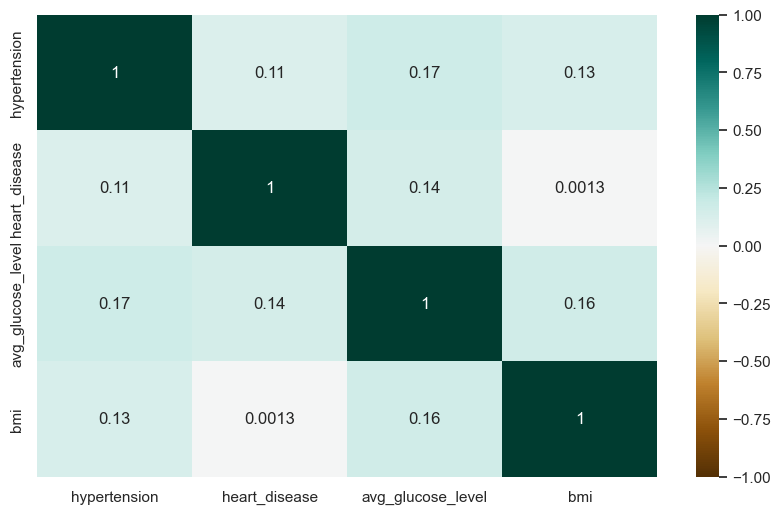

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(1,1, figsize=(10,6))
# REMINDER: INCLUDE NUMERICAL COLUMNS IN THE CORRELATION MATRIX ONLY!!!!!
# DROP THE TARGET AND OTHER CATEGORICAL COLUMNS

incl_columns_corr = ['hypertension','heart_disease','avg_glucose_level','bmi']
sns.heatmap(df[incl_columns_corr].corr(),
            vmin=-1, vmax=1, annot=True,
            ax=ax, cmap='BrBG')

#### 8b. Homework (Ungraded). Using the EDA template, select 3 variables of choice and use the EDA excel template + Jupyter notebook code to explore addiction rates.

#### 9. (2 pts) Show the class distribution

Counter({1: 3246, 0: 3246})


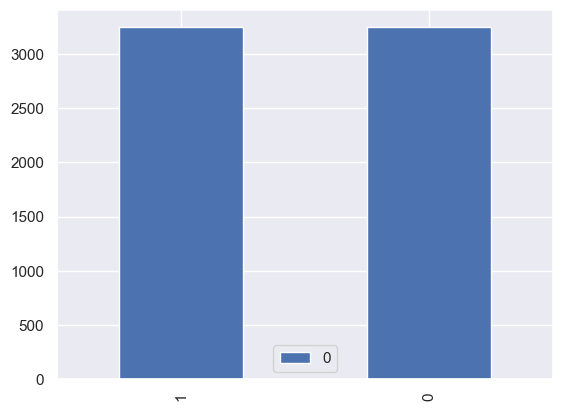

In [13]:
from collections import Counter

# Due to imbalanced distribution, random oversampling is applied
X = df.drop('stroke',axis=1) # feature
y = df['stroke']

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# the PCC will be computed based on the distribution of the ACTUAL labels
y_true = y_res

state_counts = Counter(y_true)
print(state_counts)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

#### 10. (1 pt) What is the minimum required accuracy for the model to be deemed significant?

In [14]:
print(f"PCC: {100*num.sum()}")

pcc125 = 1.25*100*num.sum()
print("1.25 * Proportion Chance Criterion: {}%".format(pcc125))

PCC: 50.0
1.25 * Proportion Chance Criterion: 62.5%


#### 11. (1 pt) Extract features and target

In [15]:
X = df.drop('stroke',axis=1) # feature
y = df['stroke']

#### 12. (2 pts) Perform one-hot encoding on the feature matrix **IF NECESSARY** (X)

In [16]:
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)

X

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,age_18-30,age_31-40,age_41-50,age_51-60,age_61+,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,0,1,228,36,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0
2,0,1,105,32,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,0,0,171,34,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
4,1,0,174,24,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
5,0,0,186,29,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,1,0,71,28,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0
5102,0,0,77,21,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
5106,0,0,125,40,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
5107,0,0,82,30,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


#### 13. (1 pt) Print all feature names

In [17]:
print(X.columns)

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'age_18-30', 'age_31-40', 'age_41-50',
       'age_51-60', 'age_61+', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


#### 14. (10 pts) Implement the model selection pipeline

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from itertools import product

In [19]:
def fit_kNN(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    neighbors_settings = range(1, 20, 2)

    train_all = []
    test_all = []
    results = []

    for n_neighbors in neighbors_settings:
        # build the model
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([n_neighbors, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['n_neighbors',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']
    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.plot(neighbors_settings, train_all, '-bo', label="training set")
    ax.plot(neighbors_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,n_neighbors,train_acc,test_acc,train_test_diff
0,1,1.000000,0.903696,0.096304
1,3,0.977303,0.884241,0.093062
2,5,0.938740,0.823930,0.114810
3,7,0.916703,0.785992,0.130711
4,9,0.897312,0.745136,0.152175
5,11,0.882327,0.709144,0.173183
6,13,0.865359,0.675097,0.190262
7,15,0.849052,0.646887,0.202165
8,17,0.831644,0.622568,0.209076
9,19,0.819524,0.604086,0.215438


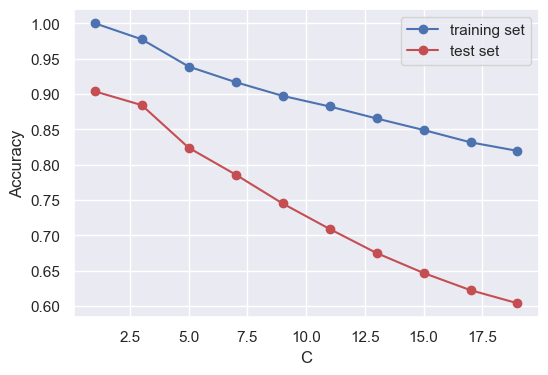

In [20]:
results_knn = fit_kNN(X, y)
results_knn

In [21]:
def fit_logregl2(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LogisticRegression(C=C, penalty='l2')
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
0,0.001,0.676224,0.765564,-0.089340
1,0.010,0.748566,0.665370,0.083197
2,0.100,0.751434,0.652724,0.098710
7,100.000,0.756065,0.648833,0.107233
8,1000.000,0.750993,0.646887,0.104105
5,15.000,0.754521,0.645914,0.108607
4,10.000,0.751434,0.643969,0.107465
6,20.000,0.749890,0.643969,0.105921
3,1.000,0.751875,0.642996,0.108879


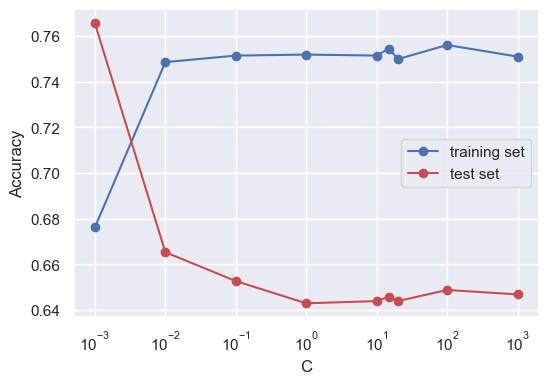

In [22]:
results_logregl2 = fit_logregl2(X,y)
results_logregl2

In [23]:
def fit_logregl1(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

     # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LogisticRegression(C=C, penalty='l1', solver='liblinear',  max_iter=10000)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
1,0.010,0.724145,0.697471,0.026675
3,1.000,0.769720,0.684825,0.084895
4,10.000,0.769500,0.684825,0.084676
5,15.000,0.769500,0.684825,0.084676
6,20.000,0.769500,0.684825,0.084676
7,100.000,0.769720,0.684825,0.084895
8,1000.000,0.769720,0.684825,0.084895
2,0.100,0.758983,0.678988,0.079995
0,0.001,0.595092,0.641051,-0.045959


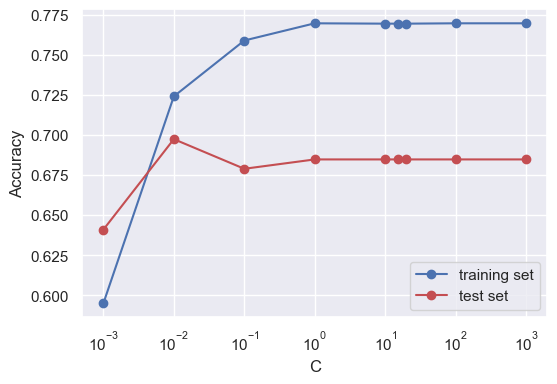

In [24]:
results_logregl1 = fit_logregl1(X,y)
results_logregl1

In [25]:
def fit_SVMl2(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

     # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LinearSVC(penalty='l2', C=C, max_iter=100000)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
0,0.001,0.756146,0.700389,0.055757
1,0.010,0.776339,0.676070,0.100269
3,1.000,0.769096,0.672179,0.096917
2,0.100,0.767340,0.668288,0.099052
7,100.000,0.760755,0.620623,0.140132
6,20.000,0.760316,0.606031,0.154285
4,10.000,0.744074,0.549611,0.194463
5,15.000,0.742318,0.549611,0.192707
8,1000.000,0.615672,0.270428,0.345244


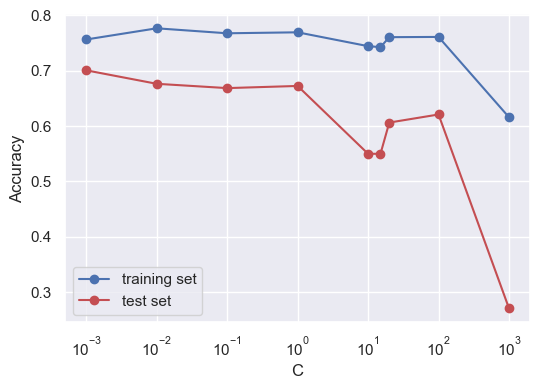

In [26]:
results_svml2 = fit_SVMl2(X, y)
results_svml2

In [27]:
def fit_SVMl1(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    C_settings = [1e-3, 1e-2, 0.1, 1, 10, 15, 20, 100, 1000]

    train_all = []
    test_all = []
    results = []

    for C in C_settings:
        # build the model
        model = LinearSVC(penalty='l1', dual=False, C=C, max_iter=100000)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([C, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['C',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))

    ax.set_xscale('log')
    ax.plot(C_settings, train_all, '-bo', label="training set")
    ax.plot(C_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("C")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,C,train_acc,test_acc,train_test_diff
1,0.010,0.748897,0.693580,0.055317
0,0.001,0.708517,0.683852,0.024665
2,0.100,0.755737,0.674125,0.081612
3,1.000,0.758385,0.673152,0.085233
4,10.000,0.754192,0.672179,0.082013
5,15.000,0.754192,0.672179,0.082013
6,20.000,0.754192,0.672179,0.082013
7,100.000,0.754192,0.672179,0.082013
8,1000.000,0.754192,0.672179,0.082013


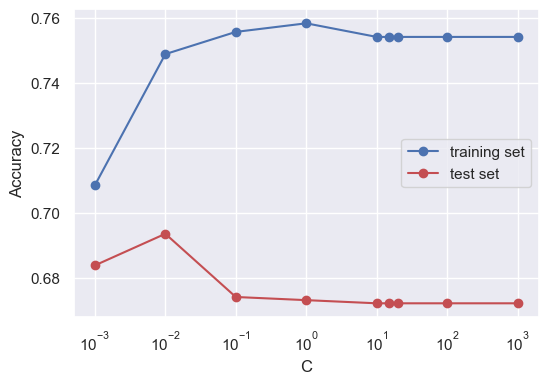

In [28]:
results_svml1 = fit_SVMl1(X, y)
results_svml1

In [29]:
def fit_dtree(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    max_depth_settings = range(1, 11)

    train_all = []
    test_all = []
    results = []

    for max_depth in max_depth_settings:
        # build the model
        model = DecisionTreeClassifier(max_depth=max_depth)
        model.fit(Xtrain_ros, ytrain_ros)
        # record training set accuracy
        train_acc = model.score(Xtrain_ros, ytrain_ros)
        train_all.append(train_acc)
        # record generalization accuracy
        test_acc = model.score(X_test, y_test)
        test_all.append(test_acc)

        results.append([max_depth, train_acc, test_acc])

    results = pd.DataFrame(results, columns=['max_depth',
                                    'train_acc',
                                    'test_acc']).sort_values('test_acc', ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']


    fig, ax = plt.subplots(1,1, figsize=(6,4))
    ax.plot(max_depth_settings, train_all, '-bo', label="training set")
    ax.plot(max_depth_settings, test_all, '-ro', label="test set")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("Accuracy")
    ax.legend()

    return results

,max_depth,train_acc,test_acc,train_test_diff
9,10,0.929798,0.810311,0.119486
8,9,0.917033,0.785992,0.131041
7,8,0.891285,0.756809,0.134476
6,7,0.851012,0.750000,0.101012
0,1,0.713688,0.701362,0.012327
1,2,0.713688,0.701362,0.012327
3,4,0.765185,0.699416,0.065769
5,6,0.836488,0.694553,0.141935
4,5,0.802377,0.665370,0.137007
2,3,0.753301,0.623541,0.129760


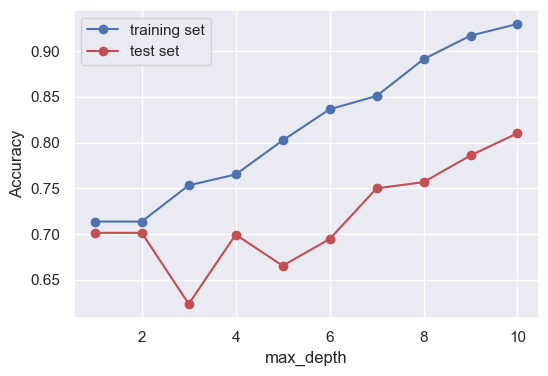

In [30]:
results_dtree = fit_dtree(X, y)
results_dtree

In [31]:
def fit_randomforest(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    results_test = []

    n_estimators_settings = [5, 10, 25, 50]
    max_depth_settings = [2, 3, 4, 5]
    max_features_settings = [0.25, 0.5, 0.75]

    for n_estimators, max_depth, max_features in product(n_estimators_settings, max_depth_settings, max_features_settings):
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features,
                                    n_jobs=1, random_state=42)
        model.fit(Xtrain_ros, ytrain_ros)
        train_score = model.score(Xtrain_ros, ytrain_ros)
        test_score = model.score(X_test, y_test)
        results_test.append([n_estimators, max_depth, max_features,
                            train_score, test_score])

    results = pd.DataFrame(results_test,
                           columns=['n_estimators', 'max_depth',
                                    'max_features', 'train_acc',
                                    'test_acc']).sort_values('test_acc',ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']

    return results

In [32]:
results_rf = fit_randomforest(X,y)

# showing top 20 hyperparameter settings
results_rf.head(20)

,n_estimators,max_depth,max_features,train_acc,test_acc,train_test_diff
25,25,2,0.50,0.704485,0.737354,-3.286860e-02
37,50,2,0.50,0.704925,0.736381,-3.145608e-02
33,25,5,0.25,0.772427,0.734436,3.799164e-02
4,5,3,0.50,0.737027,0.731518,5.509755e-03
16,10,3,0.50,0.737027,0.731518,5.509755e-03
21,10,5,0.25,0.774406,0.728599,4.580711e-02
9,5,5,0.25,0.791117,0.727626,6.349052e-02
22,10,5,0.50,0.796834,0.727626,6.920731e-02
12,10,2,0.25,0.721636,0.727626,-5.990575e-03
45,50,5,0.25,0.766271,0.726654,3.961719e-02


In [33]:
def fit_gbm(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Apply random oversampling
    Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

    results_test = []

    n_estimators_settings = [5, 10, 25, 50]
    max_depth_settings = [2, 3, 4, 5]
    lr_settings = [0.001, 0.01, 0.1]
    max_features_settings = [0.25, 0.5, 0.75]

    for n_estimators, max_depth, learning_rate, max_features in product(n_estimators_settings, max_depth_settings, lr_settings, max_features_settings):
        gbm = GradientBoostingClassifier(learning_rate=learning_rate,
                                         max_depth=max_depth, n_estimators=n_estimators,
                                         max_features=max_features,random_state=42)
        gbm.fit(Xtrain_ros, ytrain_ros)
        train_score = gbm.score(Xtrain_ros, ytrain_ros)
        test_score = gbm.score(X_test, y_test)
        results_test.append([n_estimators, max_depth,learning_rate, max_features,
                            train_score, test_score])

    results = pd.DataFrame(results_test,
                           columns=['n_estimators', 'max_depth',
                                    'learning_rate', 'max_features',
                                    'train_acc', 'test_acc']).sort_values('test_acc',ascending=False)
    results['train_test_diff'] = results['train_acc'] - results['test_acc']

    return results

In [34]:
results_gbm = fit_gbm(X, y)

# showing top 20 hyperparameter settings
results_gbm.head(20)

,n_estimators,max_depth,learning_rate,max_features,train_acc,test_acc,train_test_diff
143,50,5,0.100,0.75,0.913732,0.804475,0.109258
142,50,5,0.100,0.50,0.902949,0.792802,0.110147
106,25,5,0.100,0.50,0.863556,0.768482,0.095074
141,50,5,0.100,0.25,0.876761,0.763619,0.113142
134,50,4,0.100,0.75,0.863116,0.760700,0.102416
107,25,5,0.100,0.75,0.867298,0.760700,0.106597
133,50,4,0.100,0.50,0.858275,0.747082,0.111193
101,25,5,0.001,0.75,0.805678,0.744163,0.061514
71,10,5,0.100,0.75,0.831646,0.743191,0.088455
137,50,5,0.001,0.75,0.820423,0.741245,0.079177


#### 15. (2 pts) Consolidate all results from the model selection pipeline.

In [35]:
def transform_results_table(results, model_name):

    results2 = results.copy()

    temp = results2.drop(['train_acc','test_acc','train_test_diff'],axis=1)
    results2['hyperparameters'] = temp.apply(lambda row: {col: row[col] for col in temp.columns}, axis=1)
    results2['ML model'] = model_name

    return results2[['ML model', 'hyperparameters','train_acc','test_acc','train_test_diff']].copy()

In [36]:
all_results = {'k-Nearest Neighbors': results_knn,
               'Logistic Regression (L2)': results_logregl2,
               'Logistic Regression (L1)': results_logregl1,
               'SVM (l2)': results_svml2,
               'SVM (l1)': results_svml1,
               'Decision Tree': results_dtree,
               'Random Forest': results_rf,
               'GBM' : results_gbm}


results_lst = []
for model_name, results in all_results.items():
    results_transformed = transform_results_table(results=results,
                                                  model_name=model_name)
    results_lst.append(results_transformed)

In [37]:
consolidated_results = pd.concat(results_lst).reset_index(drop=True).sort_values(['test_acc',
                                                                                  'train_test_diff'],ascending=False)
consolidated_results = consolidated_results.loc[consolidated_results['train_test_diff']>0]

consolidated_results.head(50)

,ML model,hyperparameters,train_acc,test_acc,train_test_diff
0,k-Nearest Neighbors,{'n_neighbors': 1},1.000000,0.903696,0.096304
1,k-Nearest Neighbors,{'n_neighbors': 3},0.977303,0.884241,0.093062
2,k-Nearest Neighbors,{'n_neighbors': 5},0.938740,0.823930,0.114810
46,Decision Tree,{'max_depth': 10},0.929798,0.810311,0.119486
104,GBM,"{'n_estimators': 50.0, 'max_depth': 5.0, 'lear...",0.913732,0.804475,0.109258
105,GBM,"{'n_estimators': 50.0, 'max_depth': 5.0, 'lear...",0.902949,0.792802,0.110147
47,Decision Tree,{'max_depth': 9},0.917033,0.785992,0.131041
3,k-Nearest Neighbors,{'n_neighbors': 7},0.916703,0.785992,0.130711
106,GBM,"{'n_estimators': 25.0, 'max_depth': 5.0, 'lear...",0.863556,0.768482,0.095074
107,GBM,"{'n_estimators': 50.0, 'max_depth': 5.0, 'lear...",0.876761,0.763619,0.113142


#### 16. (5 pts) What is your best model and its hyperparameters?

In [72]:
# write the code of the best model here

best_model_info = consolidated_results.loc[104]
best_model_info

ML model                                                         GBM
hyperparameters    {'n_estimators': 50.0, 'max_depth': 5.0, 'lear...
train_acc                                                   0.913732
test_acc                                                    0.804475
train_test_diff                                             0.109258
Name: 104, dtype: object

In [73]:
best_model_params = best_model_info['hyperparameters']
print(best_model_params)

{'n_estimators': 50.0, 'max_depth': 5.0, 'learning_rate': 0.1, 'max_features': 0.75}


#### 17. (2 pts) Refit the best model

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Apply random oversampling
Xtrain_ros, ytrain_ros = ros.fit_resample(X_train, y_train)

# best_model = KNeighborsClassifier(n_neighbors=1).fit(Xtrain_ros, ytrain_ros)
# best_model = KNeighborsClassifier(n_neighbors=3).fit(Xtrain_ros, ytrain_ros)
# best_model = KNeighborsClassifier(n_neighbors=5).fit(Xtrain_ros, ytrain_ros)

# best_model = DecisionTreeClassifier(max_depth=10).fit(Xtrain_ros, ytrain_ros)
# best_model = DecisionTreeClassifier(max_depth=9).fit(Xtrain_ros, ytrain_ros)

# best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.5, n_estimators=50).fit(Xtrain_ros, ytrain_ros)
best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.75, n_estimators=50).fit(Xtrain_ros, ytrain_ros)


# best_model = LinearSVC(penalty='l2', C=15, max_iter=100000).fit(Xtrain_ros, ytrain_ros)
# best_model = LogisticRegression(C=0.001, penalty='l2').fit(Xtrain_ros, ytrain_ros)


#### 18. (2 pts) Show the confusion matrix (in table form, not array form)

In [75]:
from sklearn.metrics import confusion_matrix

# True values
actual = y_test
prediction = best_model.predict(X_test)

In [76]:
class_labels = [1, 0]

cm = confusion_matrix(actual, prediction, labels=class_labels)
cm = pd.DataFrame(cm, columns=[f'Predicted {c}' for c in class_labels],
                 index=[f'Actual {c}' for c in class_labels])
cm

,Predicted 1,Predicted 0
Actual 1,25,25
Actual 0,140,838


#### 19. (4 pts) Evaluate the model using the 4 performance metrics

In [77]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(actual, prediction)

print("Accuracy:", accuracy)

Accuracy: 0.8394941634241245


In [78]:
from sklearn.metrics import precision_score

precision = precision_score(actual, prediction,
                            pos_label=1) # pos_label = what is defined as the positive label

print("Precision:", precision)

Precision: 0.15151515151515152


In [79]:
from sklearn.metrics import recall_score

recall = recall_score(actual, prediction,
                            pos_label=1) # pos_label = what is defined as the positive label

print("Recall:", recall)

Recall: 0.5


In [80]:
from sklearn.metrics import f1_score

f1 = f1_score(actual, prediction,
                            pos_label=1) # pos_label = what is defined as the positive label

print("F1 score:", f1)

F1 score: 0.23255813953488375


#### 20. (2 pts) Is the model significant?

In [81]:
print(f"Accuracy: {np.round(100*accuracy,2)}%")
print(f"Baseline (PCC): {np.round(pcc125)}%")
if 100*accuracy > pcc125:
    print("Model is significant!")
else:
    print("Model is not significant!")

Accuracy: 83.95%
Baseline (PCC): 62.0%
Model is significant!


#### 21. (5 pts) Plot the feature importances

In [48]:
!pip install shap

  Using cached shap-0.45.0-cp312-cp312-win_amd64.whl.metadata (25 kB)
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached shap-0.45.0-cp312-cp312-win_amd64.whl (453 kB)
Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl (10.6 MB)


In [82]:
X_train.describe()

,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,age_18-30,age_31-40,age_41-50,age_51-60,age_61+,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.118432,0.065888,107.646789,29.805671,0.397415,0.000417,0.144287,0.146789,0.158882,0.187239,0.316931,0.756881,0.004170,0.638866,0.187656,0.020851,0.512927,0.542952,0.216013
std,0.323186,0.248138,47.764449,7.250665,0.489465,0.020421,0.351454,0.353969,0.365643,0.390185,0.465377,0.429056,0.064455,0.480430,0.390519,0.142914,0.499937,0.498256,0.411609
min,0.000000,0.000000,55.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,76.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,92.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,116.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,271.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


PermutationExplainer explainer: 2399it [02:10, 16.05it/s]                          


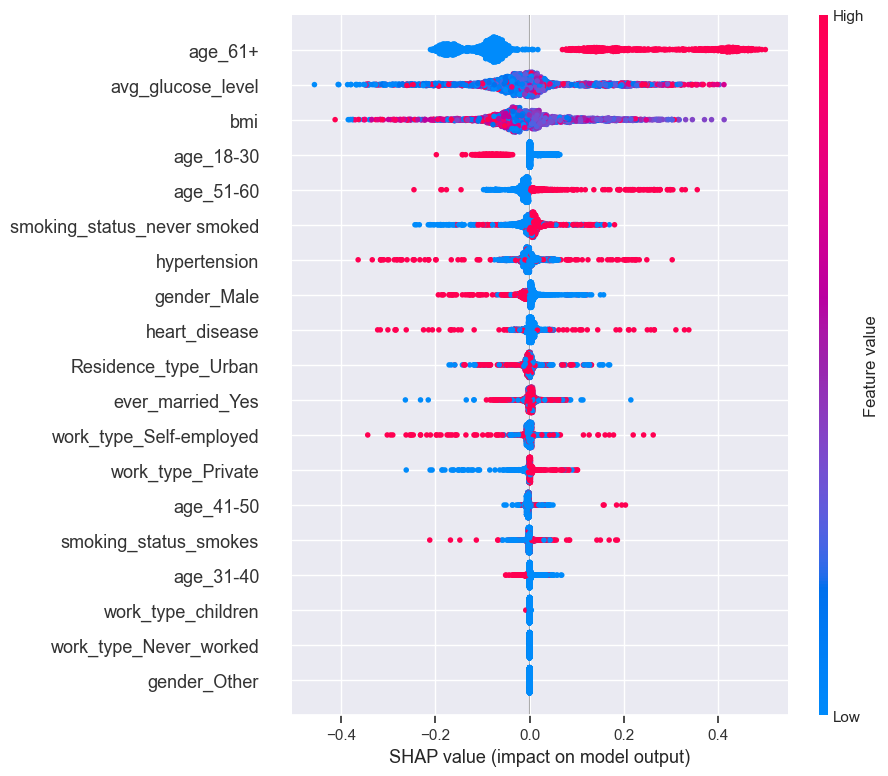

In [83]:
import shap

# Create an explainer object
explainer = shap.Explainer(best_model.predict, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)

# Plot beeswarm
shap.plots.beeswarm(shap_values, max_display=len(X_train.columns))

#### 22. (10 pts)
**GUIDE QUESTION: You are making a pitch about your research to the Philippine government and concerned agencies. You only have limited time and a lightning talk (ie. 5-min talk) is necessary. Suppose you only have at most 5 slides to deliver your message. Write the main points that you will place in each slide.**